### Is $X_1*X_2$ an interaction effect? If so, is $log(X_1*X_2) = log(X_1) + log(X_2)$ an interaction effect?

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from gam_purification.purify import purify

In [12]:
x1s = np.linspace(1e-5, 1, 100)
x2s = np.linspace(1e-5, 1, 100)
log_intx = np.zeros((100, 100))
for i, x1 in enumerate(x1s):
    for j, x2 in enumerate(x2s):
        log_intx[i, j] = np.log(x1*x2)

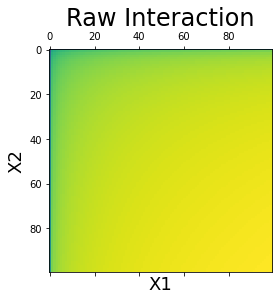

In [31]:
# The raw interaction looks like an interaction effect.
plt.matshow(log_intx, vmin=np.min(log_intx), vmax=np.max(log_intx))
plt.title("Raw Interaction", fontsize=24)
plt.xlabel("X1", fontsize=18)
plt.ylabel("X2", fontsize=18)
plt.show()

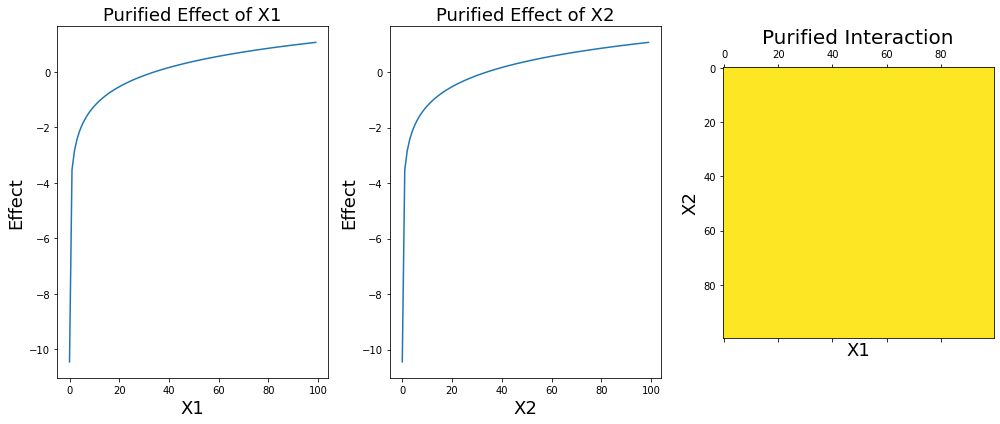

In [29]:
intercept, m1, m2, mat, i = purify(log_intx.copy(), densities=np.random.uniform(0, 1, size=log_intx.shape))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))
ax1.plot(m1)
ax1.set_title("Purified Effect of X1", fontsize=18)
ax1.set_xlabel("X1", fontsize=18)
ax1.set_ylabel("Effect", fontsize=18)

ax2.plot(m2)
ax2.set_title("Purified Effect of X2", fontsize=18)
ax2.set_xlabel("X2", fontsize=18)
ax2.set_ylabel("Effect", fontsize=18)

ax3.matshow(mat, vmin=np.min(log_intx), vmax=np.max(log_intx))
ax3.set_title("Purified Interaction", fontsize=20)
ax3.set_xlabel("X1", fontsize=18)
ax3.set_ylabel("X2", fontsize=18)
plt.tight_layout()